# MACHINE LEARNING 4-Assignment

# Problem Statement
|Predicting Survival in the Titanic Data Set We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [1]:
# Solution:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
# Url= https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.


# Age

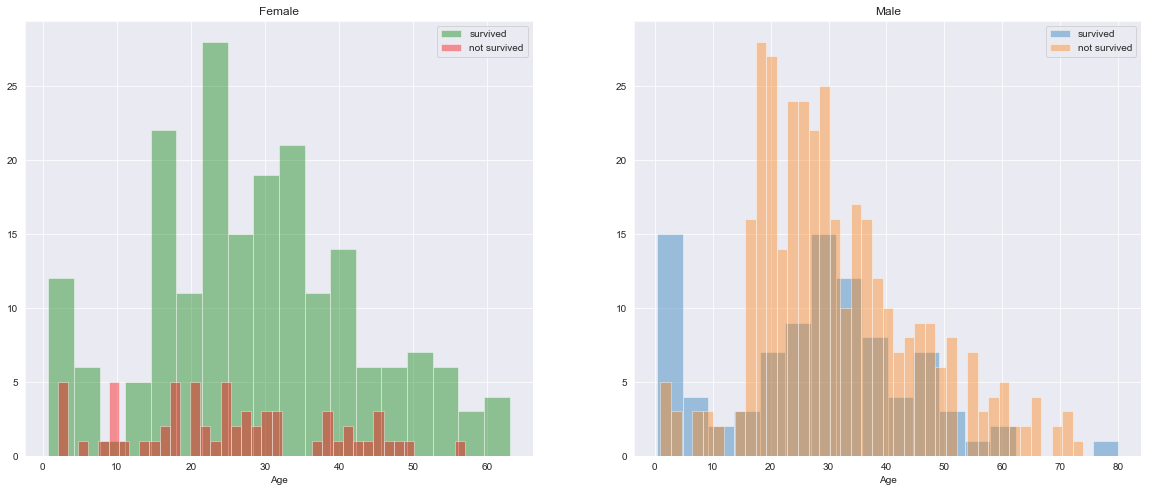

In [9]:
survived = 'survived'
not_survived = 'not survived'
sb.set_style("darkgrid")
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color='g')
ax = sb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color='r')
ax.legend()
ax.set_title('Female')
ax = sb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

# Pclass and Sex

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


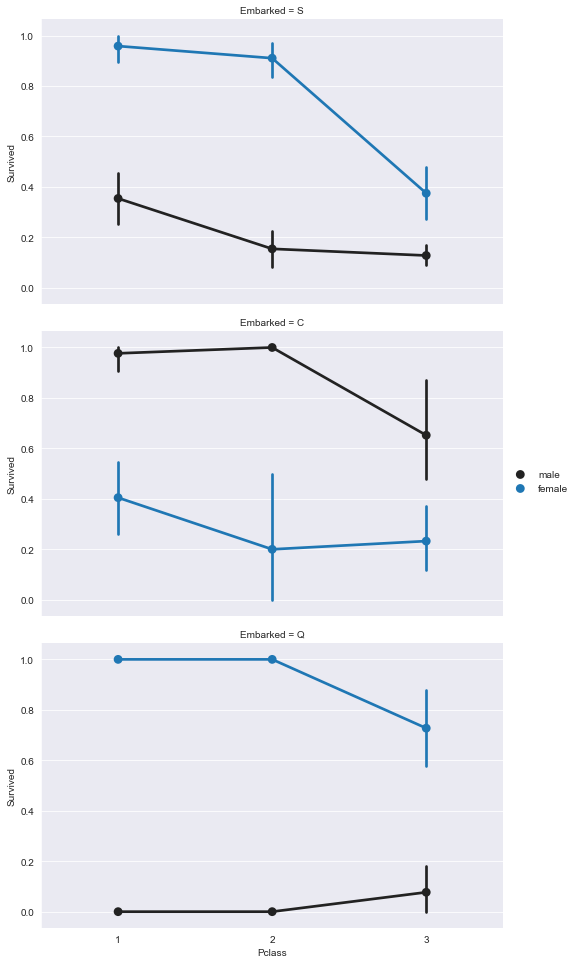

In [10]:
FacetGrid = sb.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

# Pclass

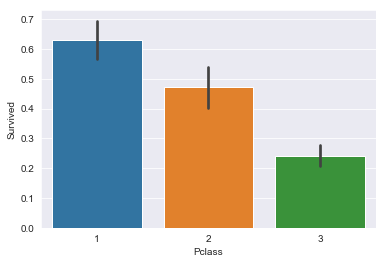

In [11]:
sb.barplot(x='Pclass', y='Survived', data=titanic)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


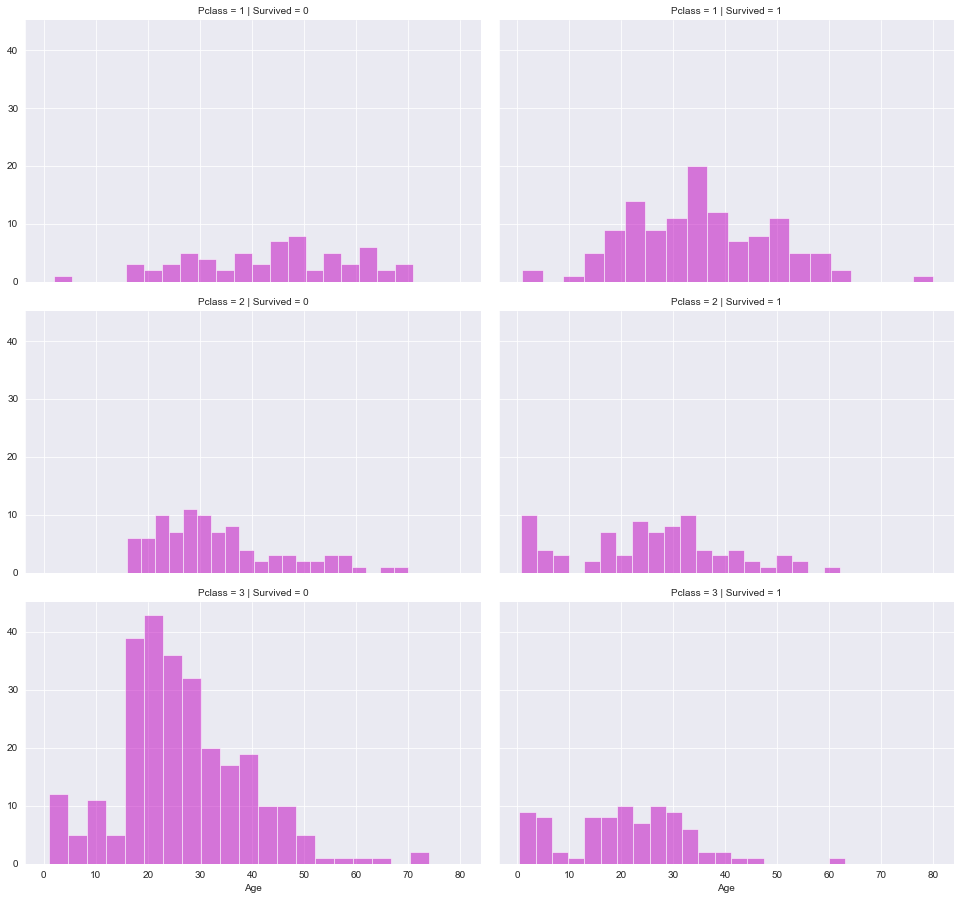

In [12]:
grid = sb.FacetGrid(titanic, col='Survived', row='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20, color="M")
grid.add_legend();

# SibSp and Parch

In [13]:
data = [titanic]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


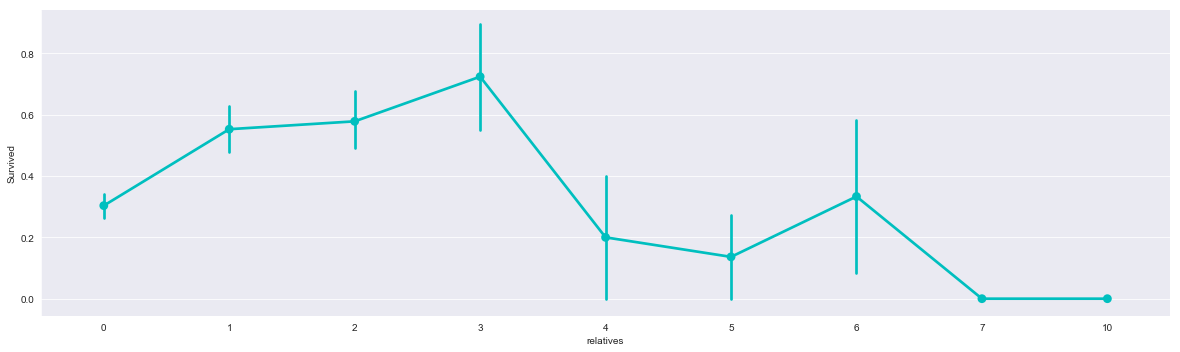

In [14]:
axes = sb.factorplot('relatives','Survived', data=titanic, aspect = 3.3, color="C")

In [22]:
def removenullfromAge(titanic):
    titanic.Age = titanic.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(titanic.Age, bins, labels=group_names)
    titanic.Age = categories
    return titanic
titanic=removenullfromAge(titanic)

In [23]:
titanic.isnull().values.sum()

689

In [24]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


In [25]:
# drop the not required columns
titanic = titanic.drop(columns = ['PassengerId','Ticket','Name','Cabin','Embarked'])

In [26]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,Student,1,0,7.2500
1,1,1,female,Adult,1,0,71.2833
2,1,3,female,Young Adult,0,0,7.9250
3,1,1,female,Young Adult,1,0,53.1000
4,0,3,male,Young Adult,0,0,8.0500


In [27]:
    titanic.isnull().values.sum()

0

In [29]:
bins = (-1, 0, 8, 15, 31, 1000)
group_names = ['Unknown', 'Low_Fare', 'Med_fare', 'High_Fare', 'Very_High_Fare']
categories = pd.cut(titanic.Fare, bins, labels=group_names)
titanic.Fare = categories

In [30]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,Student,1,0,Low_Fare
1,1,1,female,Adult,1,0,Very_High_Fare
2,1,3,female,Young Adult,0,0,Low_Fare
3,1,1,female,Young Adult,1,0,Very_High_Fare
4,0,3,male,Young Adult,0,0,Med_fare


In [31]:
titanic['Sex'],uniq = pd.factorize(titanic['Sex'])
titanic['Fare'],uniq = pd.factorize(titanic['Fare'])
titanic['Age'],uniq = pd.factorize(titanic['Age'])

In [32]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,0,1,0,0
1,1,1,1,1,1,0,1
2,1,3,1,2,0,0,0
3,1,1,1,2,1,0,1
4,0,3,0,2,0,0,2


# Decision Tree

In [33]:
y=titanic['Survived']
X=titanic.drop('Survived',axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from time import time
from operator import itemgetter

In [37]:
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_params_
    return top_params

In [38]:
param_grid_dt={'criterion':['gini','entropy'],
              'min_samples_split':[5,10,20,30,40],
              'max_depth':[2,3,5,7,9,15,20],
              'min_samples_leaf':[1,5,10,20,25,30]}

In [39]:
model_dt=DecisionTreeClassifier()

In [40]:
top_para=GridSearch_BestParam(X_train,y_train,model_dt,param_grid_dt,cv=10)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
print(top_para)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [43]:
best_dt=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=5,min_samples_split=5)

In [44]:
best_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
best_dt.score(X_train,y_train)

0.8459069020866774

In [46]:
y_pred = best_dt.predict(X_test)

In [47]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.8432835820895522


In [48]:
(y_test != y_pred).sum()

42

In [49]:
from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       166
           1       0.86      0.71      0.77       102

   micro avg       0.84      0.84      0.84       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

